# FAIRe Qualitäts-KPIs
Autor:Linus Schütte  
Datum:24.10.2023

## Forschungsfrage
Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:

__Forschungsfrage Nummer 1:__
Inwiefern beieinflusst das Design die KPI des Legofahrzeuges?


__Forschungsfrage Nummer 2:__
Auf welche Komponenten kann für ein möglichst günstiges Fahrzeug verzichtet werden?

__Forschungsfrage Nummer 3:__
Welchen Einfluss hat ein luxeriöses Legofahrzeug auf das Gewicht?

## Erstes Fahrzeug


### Versuchsziel
Formulieren Sie ein Versuchsziel für diesen ersten Versuch:

Das Zusammenbauen eines möglichst preiswerten Autos.

### Versuchsaufbau

Bauen Sie ein erstes Fahrzeug aus den gegebenen LEGO-Teilen in der CAD-Software LeoCAD auf.

Hierbei gelten die folgenden Rahmenbedingungen:
- Das Fahrzeug muss aus Baugruppen, Bauteilen und Komponenten bestehen.
- Es muss mindestens vier Räder besitzen
- Es muss sich durch den elektrischen Antrieb fortbewegen können. 
- Die Verwendung eines Getriebes zwischen Motor und Antriebsachse(n) ist verpflichtend. 
- Die Farbe von mindestens einem Teil soll sich von der in LeoCAD hinterlegten Standardfarbe unterscheiden.
- Es sind nur die LEGO-Teile zu verwenden, welche sich in den JSON-Dateien bzw. in
der zur Verfügung gestellten Teilebibliothek befinden.

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu (*Hinweise: Ein Bild lässt sich mit \!\[Bildbeschreibung](/Pfad/zum/Bild) hinzufügen. Achten Sie darauf, das Bild später auch in Git hinzuzufügen*):


![erstes Auto](figures/Auto1.png)

Beschreiben Sie kurz und präzise Ihr Fahrzeug:


Das Fahrzeug wurde einfach gehalten. 
Auf den Achsen sind die Räder mit 2 Buchsen hälften fixiert. 2 zweier Blöcke mit Loch in der Mitte bilden mittels 2x 1x16 Technicblöcke den Rahmen. Durch das Loch im 2er Block ist die Welle geführt.
Zur Versteifung sind quer zu den 1x16 Blöcken 2 1x8 Blöcke auf denen die Batterie liegt. Der Motor ist miitels 2 Pins an einem der Querbalken fixiert. Mittels einer kleinen technic Axle wird das Moment vom Motor an ein Strinrad mit 8 Zähnen geführt. Mittels eines 20 zähniges Stirnrad wird das Moment auf die Welle Übertragen

Bauen Sie das Fahrzeug nun in unserem Software-Framework zusammen. Instanziieren Sie die LEGO-Teile und lesen Sie dabei auch die Eigenschaften ein. Ergänzen Sie zusätzliche Eigenschaften, wie z.B. die Farbe. Referenzieren Sie die Teile aufeinander und erstellen Sie auf diese Weise sinnvolle Bauteile, Baugruppen und das
Gesamtsystem. Nutzen Sie die hierfür bereitgestellten Klassendefinitionen und Methoden. Achten Sie auf eine gute Code-Dokumentation. Sie können sich für die Bearbeitung an den zur Verfügung gestellten Code-Zellen orientieren, können hiervon jedoch auch abweichen.

*Hinweise: Achten Sie auf die Unterschiede zum Minimalbeispiel. Eine direkte Kopie ist nicht möglich. Achten Sie außerdem darauf, ein Teil (eindeutig identifiziert durch seine UUID) nicht an mehreren Stellen zu verbauen*

In [1]:
import json
import pprint
from functions import calculation_rules
from functions.classes import LegoComponent
from functions.classes import LegoAssembly
from functions.classes import AggregationLayer
from functions.classes import KPIEncoder
from functions.classes import print_assembly_tree

In [2]:
# Create Wheels and Axels 
## front axle Component
### Import Frontwheel Left

with open ("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)

front_wheel_l = LegoComponent("front wheel l", wheels["3482c01"])
pprint.pprint(front_wheel_l.properties)

### Clone Frontwheel left for right side

front_wheel_r = front_wheel_l.clone("front wheel r")
pprint.pprint(front_wheel_r.properties)

### Import Frontaxle

with open ("datasheets/axles.json") as json_file:
    axles = json.load(json_file)
front_axle = LegoComponent("front axle",axles["60485"])
pprint.pprint(front_axle.properties)


      


{'category': 'wheel',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3482c01#T=C',
 'delivery time [days]': 5,
 'diameter [mm]': 24.0,
 'item description': 'wheel 24',
 'item number': '3482c01',
 'label': 'front wheel l',
 'mass [g]': 3.0,
 'price [Euro]': 0.01,
 'related items': 3483}
{'category': 'wheel',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3482c01#T=C',
 'delivery time [days]': 5,
 'diameter [mm]': 24.0,
 'item description': 'wheel 24',
 'item number': '3482c01',
 'label': 'front wheel r',
 'mass [g]': 3.0,
 'price [Euro]': 0.01,
 'related items': 3483}
{'category': 'axle',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=60485#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 7,
 'dimension [studs]': 9,
 'item description': 'Axle 9 studs',
 'item number': 60485,
 'label': 'front axle',
 'mass [g]': 1.3,
 'price [Euro]': 0.01}


In [3]:
# front axle subassembly

front_axle_assembly = LegoAssembly(
     AggregationLayer.SUBASSEMBLY,
    "front axle assembly",
    assembly_method = "stick together like blocks")

front_axle_assembly.add([front_wheel_l,front_wheel_r, front_axle])

# rear axle subassembly through clone 

rear_axle_assembly = front_axle_assembly.clone("rear axle assembly")


axle_assembly = LegoAssembly(
     AggregationLayer.ASSEMBLY,
    "axle assembly")
axle_assembly.add([front_axle_assembly,rear_axle_assembly])


In [4]:
# Create Frame 
## Import technic Brick 1x2 with hole for front left
with open ("datasheets/frame.json") as json_file:
    frame = json.load(json_file)

frame2_f_l = LegoComponent("frame2_f_l", frame["3700"])
pprint.pprint(frame2_f_l.properties)

## Import technic Brick 1x2 with hole for front right
frame2_f_r = frame2_f_l.clone("frame2_f_r")

## Import technic Brick 1x2 with hole for rear left
frame2_r_l = frame2_f_l.clone("frame2_r_l")

## Import technic Brick 1x2 with hole for rear right
frame2_r_r = frame2_f_l.clone("frame2_r_r")

## Import technic Brick 1x8 with holes for rear
with open ("datasheets/frame.json") as json_file:
    frame = json.load(json_file)

frame8_r = LegoComponent("frame8_r", frame["3702"])
pprint.pprint(frame8_r.properties)

## Clone Brick 1x8 for rear for front
frame8_f = frame8_r.clone("frame8_f")

## Import technic Brick 1x16 with holes for leftside and change color to grey
with open ("datasheets/frame.json") as json_file:
    frame16_l = json.load(json_file)

frame16_l = LegoComponent("frame16_l", frame["3703"])
pprint.pprint(frame16_l.properties)
frame16_l.properties["color"] = "dark grey"

## Clone Brick 1x16 for leftside for rightside
frame16_r = frame16_l.clone("frame16_r")


{'category': 'frame',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3700#T=C',
 'delivery time [days]': 3,
 'dimension [studs]': '1 x 2',
 'item description': 'Technic, Brick 1 x 2 with Hole',
 'item number': 3700,
 'label': 'frame2_f_l',
 'mass [g]': 0.82,
 'price [Euro]': 0.01}
{'category': 'frame',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3702#T=C',
 'delivery time [days]': 5,
 'dimension [studs]': '1 x 8 x 1',
 'item description': 'Technic, Brick 1 x 8 with Holes',
 'item number': 3702,
 'label': 'frame8_r',
 'mass [g]': 2.85,
 'price [Euro]': 0.01}
{'category': 'frame',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3703#T=C',
 'delivery time [days]': 5,
 'dimension [studs]': '1 x 16 x 1',
 'item description': 'Technic, Brick 1 x 16 with Holes',
 'item number': 3703,
 'label': 'frame16_l',
 'mass [g]': 5.87,
 'price [Euro]': 0.07}


In [5]:
# Frame Assembly

frame_assembly = LegoAssembly(
     AggregationLayer.ASSEMBLY,
    "frame assembly",
    assembly_method = "stick together like blocks")

frame_assembly.add([frame2_f_l, frame2_f_r, frame2_r_l, frame2_r_r, frame8_r, frame8_f, frame16_l, frame16_r])


In [6]:
# create transmission
## create gear_motor
with open ("datasheets/gears.json") as json_file:
    gears = json.load(json_file)

gear_motor = LegoComponent("gear_motor", gears["3647"])
pprint.pprint(gear_motor.properties)

## create motor_axle
with open ("datasheets/axles.json") as json_file:
    axle = json.load(json_file)

motor_axle = LegoComponent("motor_axle", axles["32073"])
pprint.pprint(motor_axle.properties)

## create gear_axle
with open ("datasheets/gears.json") as json_file:
    gears = json.load(json_file)
gear_axle = LegoComponent("gear_axle", gears["32269"])
pprint.pprint(gear_axle.properties)  
    
# Assemble transmission   

transmission_assembly = LegoAssembly(
     AggregationLayer.SUBASSEMBLY,
    "transmission assembly",
    assembly_method = "stick together like blocks")

transmission_assembly.add([gear_motor,gear_axle, motor_axle])


{'category': 'gear',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3647#T=C',
 'delivery time [days]': 11,
 'item description': 'Gear 8 Tooth',
 'item number': 3647,
 'label': 'gear_motor',
 'mass [g]': 0.16,
 'price [Euro]': 0.14}
{'category': 'axle',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=32073#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 3,
 'dimension [studs]': 5,
 'item description': 'Axle 5 studs',
 'item number': 32073,
 'label': 'motor_axle',
 'mass [g]': 0.66,
 'price [Euro]': 0.001}
{'category': 'gear',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=32269#T=C',
 'delivery time [days]': 13,
 'item description': 'Gear 20 Tooth',
 'item number': 32269,
 'label': 'gear_axle',
 'mass [g]': 1.4,
 'price [Euro]': 0.36}


In [7]:
#drive unit
##Import Pin
with open ("datasheets/frame.json") as json_file:
    frame = json.load(json_file)

pin_l = LegoComponent("pin_l", frame["3673"])
pprint.pprint(pin_l.properties)

## Clone pin for right side
pin_r = pin_l.clone("pin_r")

## Import Motor
with open ("datasheets/motors.json") as json_file:
    motors = json.load(json_file)
    
motor_9V = LegoComponent("motor_9V", motors["88003-1"])
pprint.pprint(motor_9V.properties)

###Motor Assembly
motor_assembly = LegoAssembly(
     AggregationLayer.SUBASSEMBLY,
    "motor assembly",
    assembly_method = "stick together like blocks")

motor_assembly.add([pin_l, pin_r, motor_9V])

## Import battery 
with open ("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)
    
battery = LegoComponent("battery", batteries["2847c01"])
pprint.pprint(battery.properties)

{'category': 'frame',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3673&name=Technic,%20Pin%20without%20Friction%20Ridges&category=%5BTechnic,%20Pin%5D#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 3,
 'dimension [studs]': 1,
 'item description': 'Technic, Pin without Friction Ridges',
 'item number': 3673,
 'label': 'pin_l',
 'mass [g]': 0.16,
 'price [Euro]': 0.01}
{'category': 'motor',
 'compatible battery': '8881, 8878, 88000',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?S=88003-1&name=Power%20Functions%20L-Motor&category=%5BPower%20Functions%5D#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 3,
 'dimensions [cm]': '13 x 11 x 2.5',
 'idle current [mA]': 120,
 'idle speed [rev per min]': 390,
 'input voltage [V]': 9,
 'item description': 'Power Functions L-Motor',
 'item number': '88003-1',
 'label': 'motor_9V',
 'locking torque [Ncm]': 18,
 'mass [g]': 48.0,
 'price [Euro]': 15,
 'related items': '8881, 8878, 88000'}
{'ca

In [8]:
# Assembly Drive Unit
drive_unit_assembly = LegoAssembly(
     AggregationLayer.ASSEMBLY,
    "drive unit",
    assembly_method = "stick together like blocks")

drive_unit_assembly.add([battery, motor_assembly, transmission_assembly])



In [9]:
# Systemassembly
car = LegoAssembly(
     AggregationLayer.SYSTEM,
    "car")

car.add([drive_unit_assembly, frame_assembly, axle_assembly])
assemblytree = print_assembly_tree(car)

LegoAssembly car [db66c84d-0ee1-4b15-a549-2ab19e01b28d]
├── LegoAssembly drive unit [8e0e1e4b-b5a0-4402-b531-212c1c2efa99]
│   ├── LegoAssembly motor assembly [278524f1-e27c-4e1e-b9a6-669cf9cf8e05]
│   │   ├── LegoComponent pin_l [7ceffab6-fcea-4eeb-9f38-b2f476d4f9c0]
│   │   ├── LegoComponent pin_r [e1e9b390-dfe9-459a-bed9-95efc84eef9e]
│   │   └── LegoComponent motor_9V [01c240de-6435-4000-ad40-05a26df1badc]
│   ├── LegoAssembly transmission assembly [cb82841c-277e-4cb0-950c-0968b7e79246]
│   │   ├── LegoComponent gear_motor [680f861e-0cd7-4c60-a438-8b7bf43e8e20]
│   │   ├── LegoComponent gear_axle [9c7b1139-7e6d-4851-94e3-5af09b480adf]
│   │   └── LegoComponent motor_axle [61b5260c-0c01-4757-9976-d19b579f114a]
│   └── LegoComponent battery [003846df-0637-41b2-a0f2-f43b66559b87]
├── LegoAssembly frame assembly [d40fc95f-d78e-4da5-9034-5cddf9255e69]
│   ├── LegoComponent frame2_f_l [cf8e991c-684d-4d24-827d-a10c79d848d2]
│   ├── LegoComponent frame2_f_r [dfa841f8-ada6-4337-aac7-cef1737

### Analyse
Bestimmen Sie die Qualität Ihres Fahrzeugs mittels KPIs.
Die Qualität des Fahrzeugs ist mit mindestens einem KPI je Qualitätsdimension (Aufwand, Verfügbarkeit, Akzeptanz) zu bestimmen. Enwickeln Sie zunächst sinnvolle KPIs, welche mit den gegebenen Daten umsetzbar sind. Halten Sie die Berechnungsvorschriften im Jupyter Notebook fest. Implementieren Sie deren Berechnung für das Gesamtsystem "Fahrzeug" mittels einzelner Funktionen im Skript `calculation_rules`. Sie können zusätzlich Ihre Methoden auch auf die niedrigeren Aggregationsebenen anwenden.

Beschreiben Sie den jeweiligen KPI und geben Sie seine Berechnungsvorschrift an:

$$
a = \frac{b}{c} + d
$$

**KPI Gesamtpreis (Qualitätsdimension Aufwand)**

Gesamtpreis = Summe aller Bauteilkosten

**KPI Lieferzeit (Dimension Verfügbarkeit)**

Lieferzeit = längste Lieferzeit

**KPI Gesamtmasse (Dimension Akzeptanz)**

Gesamtmasse = Summe aller Bauteilmassen


Halten Sie die berechneten Werte für die KPIs im Notebook
fest:

In [10]:
# test the import

calculation_rules.test_function()

# KPI Gesamtmasse 

total_mass = calculation_rules.kpi_mass(car)
print("Gesamtmasse: ", total_mass, "g")
car.properties["mass [g]"] = total_mass

# KPI Lieferzeit 
max_delivery_time = calculation_rules.kpi_delivery_time(car)
print("Lieferzeit: ", max_delivery_time, "days")
car.properties["delivery time [days]"] = max_delivery_time

# KPI Preis
total_price = calculation_rules.kpi_price(car)
print("Gesamtpreis: ", total_price, "Euro")
car.properties["price [Euro]"] = total_price

You called the test function.
Gesamtmasse:  258.56 g
Lieferzeit:  13 days
Gesamtpreis:  17.78100000000002 Euro


Exportieren Sie schließlich Ihr entworfenes Fahrzeug inklusive der entwickelten KPIs:

In [11]:
# export car and its properties
with open("car.json", "w") as fp:
    json.dump(car.to_dict(), fp, cls=KPIEncoder, indent=4)

## Zweites Fahrzeug

### Versuchsziel

Setzen Sie sich ein Ziel, welche Qualitätsdimensionen in einem zweiten Fahrzeug verbessert werden sollen und bauen
Sie darauf aufbauend ein zweites Fahrzeug aus den gegebenen LEGO-Teilen auf.
Die Anforderungen an das Fahrzeug sind identisch zum ersten. Wählen Sie die Einzelteile und deren Zusammenspiel entsprechend Ihrer Zielstellung aus.

Formulieren Sie ein Versuchsziel für diesen Versuch. Beschreiben Sie unter anderem, welche Verbesserung Sie vornehmen möchten:

Ein effizienteres Fahrzeug gestalten. Das Getriebe soll besser Gestaltet werden. Zudem soll der Rahmen stabiler gestaltet werden

### Versuchsaufbau

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu:

![zweites Auto](figures/Auto2.png)

Beschreiben Sie kurz und präzise den Aufbau des zweiten Fahrzeugs:

Das zweite Auto besteht aus 2 Rahmen hälften, welche mit einem 2 Fach Pin verbunden sind auf der einen Rahmen hälfte ist der Motor in einem Gehäuse aus blöcken untergebracht. Der akku ist im 2 Rahmen mittels pins verbunden. Der antrieb wurde mitells eines Schneckengetribes realisiert, wodurch das Fahrzeug langsam aber ein Steigung hochkommt. Die Räder wurden auch größer und mit glatten Profil gewählt um laufruhiger zu sein.

Erstellen Sie das Fahrzeug in unserem Softwareframework:

In [12]:
# axels 
## initialize components
## wheel leftside

with open ("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)

wheel_l = LegoComponent("wheel l", wheels["41896c04"])
pprint.pprint(wheel_l.properties)

## Clone Frontwheel for right side

wheel_r = wheel_l.clone("wheel r")
pprint.pprint(wheel_r.properties)

## Axel
with open ("datasheets/axles.json") as json_file:
    axles = json.load(json_file)

axle = LegoComponent("axle", axles["3708"])
pprint.pprint(axle.properties)

### assemble frontaxle

front_axle_assembly_2 = LegoAssembly(
     AggregationLayer.SUBASSEMBLY,
    "front axle 2 assembly")

front_axle_assembly_2.add([wheel_l,wheel_r, axle])

### clone frontaxle for rear

rear_axle_assembly_2 = front_axle_assembly_2.clone(["rear axle 2 assembly"])

##### axle front and rear assembly

axle_assembly_2 = LegoAssembly(
     AggregationLayer.ASSEMBLY,
    "axle assembly 2")
axle_assembly_2.add([rear_axle_assembly_2,front_axle_assembly_2])

{'category': 'wheel',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=41896c04#T=C',
 'delivery time [days]': 5,
 'diameter [mm]': 56.0,
 'item description': 'wheel 56',
 'item number': '41896c04',
 'label': 'wheel l',
 'mass [g]': 23.0,
 'price [Euro]': 0.45,
 'related items': 41897}
{'category': 'wheel',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=41896c04#T=C',
 'delivery time [days]': 5,
 'diameter [mm]': 56.0,
 'item description': 'wheel 56',
 'item number': '41896c04',
 'label': 'wheel r',
 'mass [g]': 23.0,
 'price [Euro]': 0.45,
 'related items': 41897}
{'category': 'axle',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3708#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 7,
 'dimension [studs]': 12,
 'item description': 'Axle 12 studs',
 'item number': 3708,
 'label': 'axle',
 'mass [g]': 1.82,
 'price [Euro]': 0.02}


In [13]:
# frame 
## initalize components for front frame part
## Frame 4x6 Unten
with open ("datasheets/frame.json") as json_file:
    frame = json.load(json_file)

frame_big_lower = LegoComponent("frame front", frame["32531"])
pprint.pprint(frame_big_lower.properties)

## Frame 4x6 oben 
frame_big_upper = frame_big_lower.clone(["frame front up"])

## Brick 2x1 with hole 1
with open ("datasheets/frame.json") as json_file:
    frame = json.load(json_file)

brick_2_1 = LegoComponent("Brick 2_1", frame["3700"])
pprint.pprint(frame_big_lower.properties)

##Brick 2x1 with hole 2

brick_2_2 = brick_2_1.clone(["brick 2_2"])


##Brick 2_1 and 2_2 Subassembly
bricks_1 = LegoAssembly(
     AggregationLayer.SUBASSEMBLY,
    "Bricks")
bricks_1.add([brick_2_2, brick_2_1])

## Bricktower clone
bricks_2 = bricks_1.clone(["bricks 2"])

## 1x8 with holes 
with open ("datasheets/frame.json") as json_file:
    frame = json.load(json_file)

brick_1x8 = LegoComponent("Brick 1x8", frame["3702"])
pprint.pprint(brick_1x8.properties)

## Subassembly bricktower 1 and 2 and brick 1x8
inbetween_r = LegoAssembly(
     AggregationLayer.SUBASSEMBLY,
    "inbetween r")
inbetween_r.add([bricks_1, bricks_2, brick_1x8])

## Clone inbetween for left side

inbetween_l = inbetween_r.clone(["inbetween l"])

## clone for Frame rear

frame_rear = frame_big_lower.clone(["frame rear"])

## crossblock pin 
with open ("datasheets/frame.json") as json_file:
    frame = json.load(json_file)

cross_pin = LegoComponent("crossblock pin", frame["48989"])
pprint.pprint(cross_pin.properties)

## pins for motormount
with open ("datasheets/frame.json") as json_file:
    frame = json.load(json_file)

pin_1_1 = LegoComponent("pin", frame["32556"])
pprint.pprint(pin_1_1.properties)

pin_1_2 = pin_1_1.clone(["pin_1_2"])
pin_2_1 = pin_1_1.clone(["pin_2_1"])
pin_2_2 = pin_1_1.clone(["pin_2_2"])

### Assembly Motormount
frame_2 = LegoAssembly(
     AggregationLayer.ASSEMBLY,
    "Frame 2")
frame_2.add([frame_big_lower, frame_big_upper, inbetween_r, inbetween_l, 
             frame_rear, cross_pin, pin_1_1, pin_1_2, pin_2_1 ,pin_2_2])


{'category': 'frame',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=32531&idColor=11#T=C&C=11',
 'delivery time [days]': 3,
 'dimension [studs]': '4 x 6 x 1',
 'item description': 'Technic, Brick 4 x 6 Open Center',
 'item number': 32531,
 'label': 'frame front',
 'mass [g]': 5.0,
 'price [Euro]': 0.1}
{'category': 'frame',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=32531&idColor=11#T=C&C=11',
 'delivery time [days]': 3,
 'dimension [studs]': '4 x 6 x 1',
 'item description': 'Technic, Brick 4 x 6 Open Center',
 'item number': 32531,
 'label': 'frame front',
 'mass [g]': 5.0,
 'price [Euro]': 0.1}
{'category': 'frame',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3702#T=C',
 'delivery time [days]': 5,
 'dimension [studs]': '1 x 8 x 1',
 'item description': 'Technic, Brick 1 x 8 with Holes',
 'item number': 3702,
 'label': 'Brick 1x8',
 'mass [g]': 2.85,
 'price [Euro]': 0.01}
{'category': 'frame',
 'da

In [14]:
# drivetrain
## Gearbox 
## intitialize Parts for Gearbox
with open ("datasheets/gears.json") as json_file:
    gears = json.load(json_file)

worm_gear_screw = LegoComponent("worm gear screw", gears["4716"])
pprint.pprint(worm_gear_screw.properties)

with open ("datasheets/gears.json") as json_file:
    gears = json.load(json_file)

worm_gear_box = LegoComponent("worm gear box", gears["6588"])
pprint.pprint(worm_gear_box.properties)

with open ("datasheets/gears.json") as json_file:
    gears = json.load(json_file)

gear_motor = LegoComponent("gear motor", gears["3648"])
pprint.pprint(gear_motor.properties)

## Gearbox assembly
gearbox = LegoAssembly(
     AggregationLayer.SUBASSEMBLY,
    "gearbox")
gearbox.add([gear_motor, worm_gear_box, worm_gear_screw])

## Battery

with open ("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)

battery_2 = LegoComponent("battery", batteries["8881-1"])
pprint.pprint(battery_2.properties)

## Motor

with open ("datasheets/motors.json") as json_file:
    motors = json.load(json_file)

motor_2 = LegoComponent("motor", motors["8883-1"])
pprint.pprint(motor_2.properties)

with open ("datasheets/axles.json") as json_file:
    axles = json.load(json_file)
motor_axle = LegoComponent("motor axle", axles["32073"])
pprint.pprint(motor_axle.properties)

## Motor Assembly
motor_assembly = LegoAssembly(
     AggregationLayer.SUBASSEMBLY,
    "motor with axle")
motor_assembly.add([motor_axle, motor_2])

### drivetrain assembly 

drivetrain_2 = LegoAssembly(
     AggregationLayer.ASSEMBLY,
    "drivetrain assembly")
drivetrain_2.add([motor_assembly, battery_2, gearbox])

{'category': 'gear',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=4716#T=C',
 'delivery time [days]': 12,
 'item description': 'Gear Worm Screw',
 'item number': 4716,
 'label': 'worm gear screw',
 'mass [g]': 0.6,
 'price [Euro]': 0.54}
{'category': 'gear',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=6588#T=C',
 'delivery time [days]': 11,
 'item description': 'Gear Worm Gearbox',
 'item number': 6588,
 'label': 'worm gear box',
 'mass [g]': 4.5,
 'price [Euro]': 1.63}
{'category': 'gear',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3648#T=C',
 'delivery time [days]': 11,
 'item description': 'Gear 24 Tooth',
 'item number': 3648,
 'label': 'gear motor',
 'mass [g]': 1.17,
 'price [Euro]': 0.32}
{'category': 'battery',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?S=8881-1#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 3,
 'dimensions [cm]': '8,8 x 6,3 x 3,2',
 'item descr

In [15]:
# car no.2 Systemassembly
# Systemassembly
car_2 = LegoAssembly(
     AggregationLayer.SYSTEM,
    "car no.2")

car_2.add([drivetrain_2, axle_assembly_2, frame_2])
assemblytree = print_assembly_tree(car_2)


LegoAssembly car no.2 [22253b3f-3ac2-4e9b-b0b6-5e106abcc14d]
├── LegoAssembly drivetrain assembly [099f8e5e-3736-46b6-b10d-0556979a9400]
│   ├── LegoAssembly motor with axle [c19043d0-5687-4786-ac75-4ba4938f510c]
│   │   ├── LegoComponent motor axle [86e9f2ee-3083-48c4-b2c2-721140a50147]
│   │   └── LegoComponent motor [c554bcb2-cb63-4a24-943e-92d79a3226b8]
│   ├── LegoAssembly gearbox [22dcdd22-b908-4adc-a545-710c2daff088]
│   │   ├── LegoComponent gear motor [eeeb8721-8d5e-44c2-bed9-82974c556ec1]
│   │   ├── LegoComponent worm gear box [f843aabc-2781-4303-bcb0-f72ac56027b8]
│   │   └── LegoComponent worm gear screw [ab3506cf-a574-4e72-9300-b24b1d0104be]
│   └── LegoComponent battery [07a7dbe8-5e32-4462-8759-16ab7f469f2b]
├── LegoAssembly axle assembly 2 [2b42155c-9888-4f21-95ef-2ecd7cdc1f11]
│   ├── LegoAssembly ['rear axle 2 assembly'] [210360a0-d445-4261-b92c-fcd40c6202a2]
│   │   ├── LegoComponent wheel l [dca5fac7-08f3-4a2e-916a-de005f3c0707]
│   │   ├── LegoComponent wheel r [50

# Analyse
Bestimmen Sie die KPIs des zweiten Fahrzeugs

In [16]:
# calculate the KPIs for your car
# KPI Gesamtmasse 

total_mass_2 = calculation_rules.kpi_mass(car_2)
print("Gesamtmasse: ", total_mass_2, "g")
car_2.properties["mass [g]"] = total_mass_2

# KPI Lieferzeit 
max_delivery_time_2 = calculation_rules.kpi_delivery_time(car_2)
print("Lieferzeit: ", max_delivery_time_2, "days")
car_2.properties["delivery time [days]"] = max_delivery_time_2

# KPI Preis
total_price_2 = calculation_rules.kpi_price(car_2)
print("Gesamtpreis: ", total_price_2, "Euro")
car_2.properties["price [Euro]"] = total_price_2

Gesamtmasse:  346.45 g
Lieferzeit:  12 days
Gesamtpreis:  37.141000000000005 Euro


Exportieren Sie Ihr Fahrzeug inklusive der KPIs:

In [17]:
# export car and its properties
with open("car_2.json", "w") as fp:
    json.dump(car_2.to_dict(), fp, cls=KPIEncoder, indent=4)

## Diskussion
### Ergebnisse
Stellen Sie die entwickelten KPIs beider Fahrzeuge gegenüber und wählen Sie hierfür unter anderem eine geeignete
grafische Darstellung. Stellen Sie dabei insbesondere sicher, dass die Datengrundlage ersichtlich ist. Halten Sie
auch die Plotbefehle im Notebook fest:

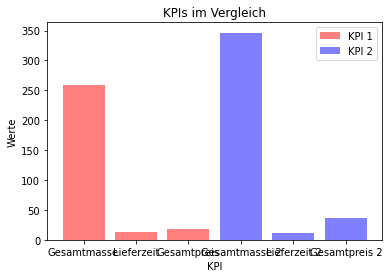

In [18]:
# plot the data, save diagramm as svg-file

import matplotlib.pyplot as plt

# Daten einlesen
KPI_1_labels = ['Gesamtmasse', "Lieferzeit", "Gesamtpreis"]
KPI_1_werte = [total_mass, max_delivery_time,total_price]
KPI_2_labels = ['Gesamtmasse 2', "Lieferzeit 2", "Gesamtpreis 2"]
KPI_2_werte = [total_mass_2, max_delivery_time_2,total_price_2]

#plot erstellen 
plt.bar(KPI_1_labels, KPI_1_werte, label="KPI 1", color='r', alpha=0.5)
plt.bar(KPI_2_labels, KPI_2_werte, label="KPI 2", color='b', alpha=0.5)

plt.xlabel('KPI')
plt.ylabel("Werte")
plt.title("KPIs im Vergleich")
plt.legend()
plt.savefig("KPI_Vergleich.svg", format = "svg")
plt.show()

Interpretieren Sie Ihre Ergebnisse. Vergleichen Sie die KPIs Ihrer Autos. Konnten Sie Ihre gewünschte Verbesserung erzielen? Welche Schlüsse ziehen Sie aus den Ergebnissen für die Qualität der beiden
Fahrzeuge?

Die Lieferzeit beim 2 Fahrzeug konnte um einen Tag verkürzt werden. Ansonsten sind die KPIs des zweiten Fahrzeugs nur gestiegen. Jedoch bin ich der Meinung das das 2 Fahrzeug sehr viel laufruhiger uns stabiler ist als das erste.

Diskutieren Sie, inwieweit Ihre entwickelten KPIs die im Skript erläuterten FAIR-Prinzipien erfüllen:

Die zur Berechnung der KPIs benötigten Daten findet man in den json Datein der jeweiligen Komponenten. Jedes Bauteil ist über eine UIID nummer identfizierbar. Dadurch können die Daten der Bauteile über die properties abgerufen werden und in Python verwendet werden. Durch die Metadaten der einzelnen Bauteile ist daher die wiederverwendbarkeit sichergestellt.

## Fazit

Ziehen Sie ein persönliches Fazit. Was haben Sie Neues gelernt?

Durch die Abgabe habe ich etwas über die FAIR Prinzipien gelernt.Zudem habe ich gelernt dass eine Verbessurung eines KPIs meist eine Verschlechterung eines anderen KPIs zurfolge hat.